# PCA

## Content
- https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

- In the present big data era, there is a need to process large amounts of unlabeled data and find some patterns in the data to use it further
    - Need to discard features that are unimportant and discover only the representations that are needed.
    - It is possible to convert high-dimensional data to low-dimensional data using different techniques, this dimension reduction is important and makes tasks such as classification, visualization, communication and storage much easier.
    - The loss of information should be less while mapping data from high-dimensional space to low-dimensional space.
-  Reducing the dimension of the feature space is called “dimensionality reduction.” 
    - Feature Elimination
    - Feature Extraction
- When should I use PCA?
    - Do you want to reduce the number of variables, but aren’t able to identify variables to completely remove from consideration?
    - Do you want to ensure your variables are independent of one another?
    - Are you comfortable making your independent variables less interpretable?

- https://rstudio-pubs-static.s3.amazonaws.com/291945_5facb930925d4fcdbc9b53d2a0ec6f53.html
- One major use of PCA lies in overcoming the multicollinearity problem. PCA can aptly deal with such situations by excluding some of the low-variance principal components in the regression step

#### Multicollinearity Challenges
- Destabilizing the parameter estimates
- Confounding model interpretions
- Increasing risk of overfitting
- Increasing computation time
- Small changes in input data (like removing or adding a single variable) leads to a large change in the model, even resulting in sign changes of parameters. Also, the presence of multicollinearity increases the variance or standard error of the coefficient estimates making it sensitive to minor changes, thus resulting in difficulty in interpretation

#### Remedies for multicollinearity and high dimensionality
- Check if one of the variables is a duplicate
- Drop a redundant variable
- Increasing the sample size by collecting more data
- Mean centering the predictor variables
- Standardization of predictor variable - if mean centering has no affect
- Principal Component Analysis, Ridge regression, partial least squares regression

#### Process
- https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
- https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
- https://www.geeksforgeeks.org/principal-component-analysis-with-python/
- https://acadgild.com/blog/16-blogs-pca-2

#### Definition
According to Wikipedia, PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. Principal components have both direction and magnitude. The direction represents across which principal axes the data is mostly spread out or has most variance and the magnitude signifies the amount of variance that Principal Component captures of the data when projected onto that axis
- The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent. The same is done by transforming the variables to a new set of variables, which are known as the principal components and are orthogonal, ordered such that the retention of variation present in the original variables decreases as we move down in the order. So, in this way, the 1st principal component retains maximum variation that was present in the original components. The principal components are the eigenvectors of a covariance matrix, and hence they are orthogonal.
- The dataset on which PCA technique is to be used must be scaled. The results are also sensitive to the relative scaling
- The PCs are essentially the linear combinations of the original variables, the weights vector in this combination is actually the eigenvector found which in turn satisfies the principle of least squares
- The PCs are orthogonal, as already discussed
- PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset
- It is linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space

#### Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do thi

#### Applications
- Dimensionality reduction technique in domains like facial recognition, computer vision and image compression
- Finding patterns in data of high dimension in the field of finance, data mining, bioinformatics, psychology, etc
- One of the most important applications of PCA is for speeding up machine learning algorithms.

#### Challenges
PCA's main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. Scikit-Learn contains a couple interesting variants on PCA, including RandomizedPCA and SparsePCA, both also in the sklearn.decomposition submodule. RandomizedPCA, which we saw earlier, uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while SparsePCA introduces a regularization term

### Steps
### For 2 D Data
- Plot all the points on the XY axis and find the best fitting line and centroid of the data
- Make the centroid as origin. The best fitting line is choosen by maximizing the projection distances from the points perpendicular projections to the line
- Line with maximum sum of squared projection distance is selected. This selected line is called PC1 (principal component 1) or eigen vector and the sum of squared projection distances is called eigen value
- The square root of eigen value is singular value and the whole process is called singular value decomposition (SVD)
- Divinding the eigen values by degrees of freedom (n-1) gives variance (variation) of PC1
- Calculating all the variances of all PC's and plotting on bar plot gives scree plot
- This scree plot is used for selection of principal components
- Additional Info: The distance(a) from points to origin (centroid) is always remains same, while the distance between projection and origin(b) and projection and the point (c) both are inversely proportional due to pythogorean theorem. So, either projection distance(b) could be maximized or projected distance (c) could be minimized. It is always easier to maximize the projection distance therefore, it is the method adopted for SVD
- PCA Analogue: Imagine taking picture (2D) of group of people (3D). Take picture from multiple directions and then compare which gives highest variation (project the 3D info into 2D). The line with highest variation or angle of projection is similar to estimating principal components of the data
- OLS?- No it is slightly different from estimating line for best fit, it is line of best projection and with a different purpose

- Projections Visualization Sample: https://jsfiddle.net/ramnathv/z45qxfp3/

## Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [15]:
df = pd.read_csv('../../Data\iris.csv')

In [16]:

df.columns = ['id','sepal_length','sepal_width','petal_length','petal_width','class']
iris_class = {'Iris-setosa':1, 'Iris-versicolor':0, 'Iris-virginica':2}
iris_names = df['class'].copy()
df['catg'] = df['class'].map(iris_class)
df.head()

,id,sepal_length,sepal_width,petal_length,petal_width,class,catg
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [17]:
df.head()

,id,sepal_length,sepal_width,petal_length,petal_width,class,catg
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [18]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

## Functions

In [20]:
def getVisual(x,y,clr):
    plt.scatter(x,y,c=clr,cmap='rainbow')
    plt.show()
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

## Splits

In [21]:
x = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['catg']
original = y

## Models

### Explanation

In [22]:
# Clustering with Standard Data
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(x)
preds = kmeans3.predict(x)
print(len(original))
print(sum(preds==original))
print(f"K Means accuracy: {sum(preds==original)/len(original)}")

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
preds = cluster.fit_predict(x)
print(f"Hierarchical accuracy: {sum(preds==original)/len(original)}")

150
36
K Means accuracy: 0.24
Hierarchical accuracy: 0.8933333333333333


In [23]:
# Clustering with Normalized Data
data_scaled = normalize(x,axis=1)
kmeans3 = KMeans(n_clusters=3)
preds = kmeans3.fit_predict(data_scaled)
print(f"K Means Normalized Accuracy: {sum(preds==original)/len(original)}")
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
preds = cluster.fit_predict(data_scaled)
print(f"Hierarchical Normalized Accuracy: {sum(preds==original)/len(original)}")

K Means Normalized Accuracy: 0.9666666666666667
Hierarchical Normalized Accuracy: 0.96


In [24]:
# Variance for Selection of Pricipal components
pca = PCA()

data_scaled = normalize(x,axis=1)

pca.fit_transform(x)
print(pca.explained_variance_ratio_)
pca.fit_transform(data_scaled)
print(pca.explained_variance_ratio_)

[0.92461621 0.05301557 0.01718514 0.00518309]
[0.96210389 0.02788074 0.00815689 0.00185849]


In [25]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(data_scaled)
# X_train = pca.fit_transform(x)

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
preds = cluster.fit_predict(X_train)
print(f"Hierarchical Normalized Accuracy: {sum(preds==original)/len(original)}")

Hierarchical Normalized Accuracy: 0.94


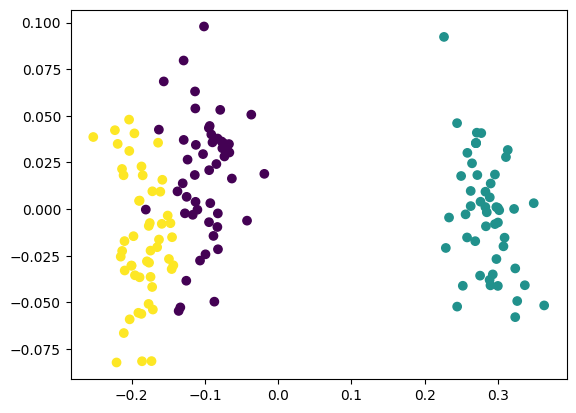

In [26]:
plt.scatter(X_train[:,0],X_train[:,1],c=original)

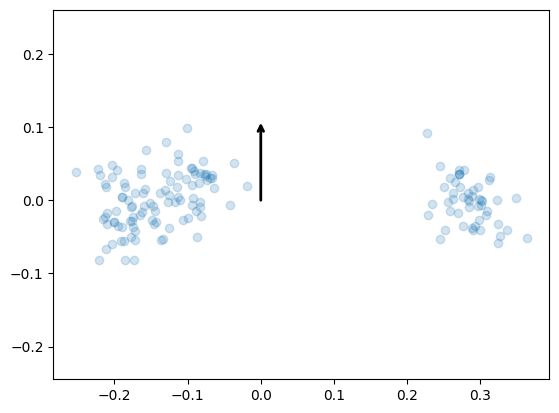

In [27]:
# plot data
pca = PCA(n_components=2)
pca.fit(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

### PCA For Visualization

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [29]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [30]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [31]:
projected

array([[ -1.25947015,  21.27487982],
       [  7.95760732, -20.76870218],
       [  6.99192827,  -9.95598144],
       ...,
       [ 10.80128248,  -6.960253  ],
       [ -4.87209811,  12.42395261],
       [ -0.3443859 ,   6.36555243]])

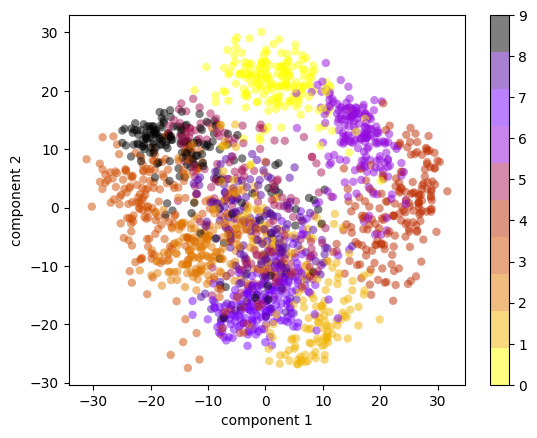

In [32]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, 
            cmap=plt.cm.get_cmap('gnuplot_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Choosing the number of components
 This can be determined by looking at the cumulative explained variance ratio as a function of the number of components

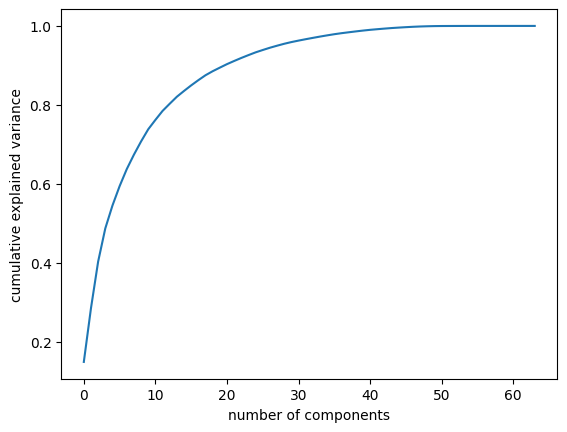

In [33]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Here the 10 components are explaining 75% of the variance while remaining 50 are explaining 25%

### PCA as Noise Filtering

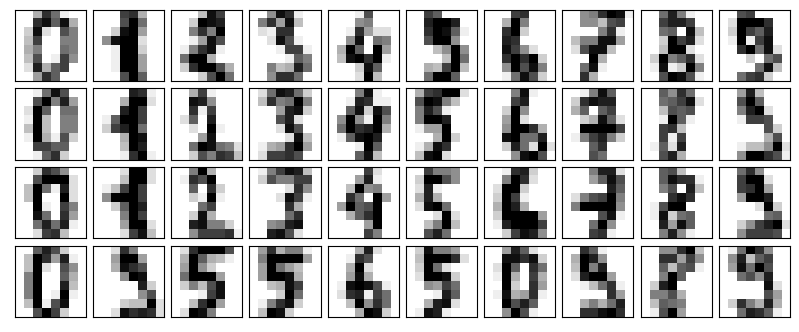

In [34]:
plot_digits(digits.data)

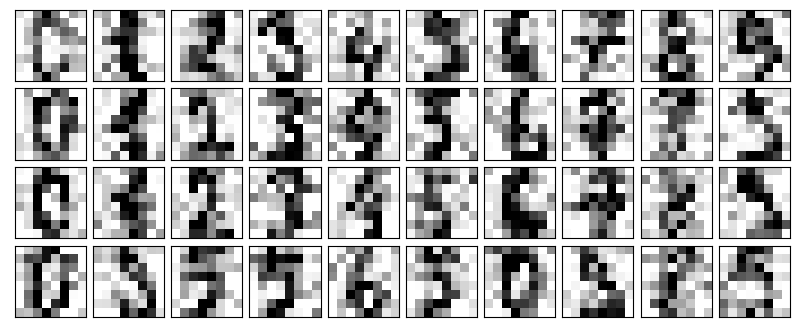

In [35]:
# After adding noise
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [36]:
# Preserving 50% of the variance. Which gives total required componensts are 12
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

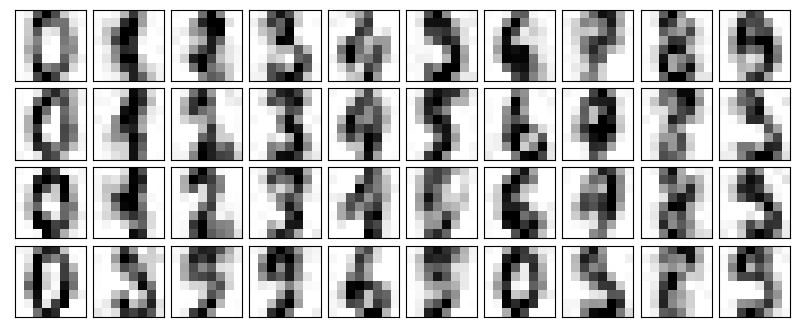

In [37]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs

## Case Study

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [39]:
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
features = breast.feature_names
features_labels = np.append(features,'label')
labels = np.reshape(breast_labels,(569,1))
breast_data.shape

(569, 30)

In [40]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset  = pd.DataFrame(final_breast_data)
breast_dataset.columns = features_labels
print(breast_dataset.shape)
breast_dataset.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### Visualizing the Breast Cancer data

In [41]:
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [42]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [43]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.head()

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [44]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 640x480 with 0 Axes>

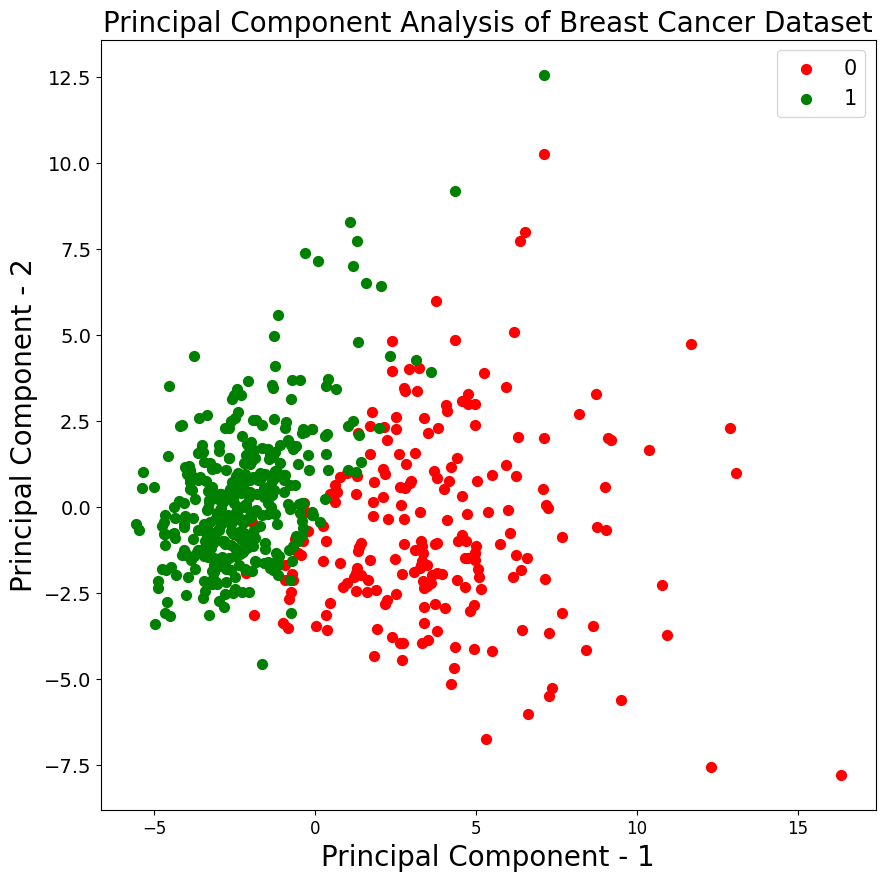

In [45]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
targets = [0, 1]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

### Method 1 (Without PCA)

#### Train Test Split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size=0.33, random_state=42)

#### Model

In [47]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
preds = rf.predict(X_test)

C:\Users\KVSH2\AppData\Local\Temp\1\ipykernel_24236\2211991798.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [48]:
confusion_matrix(y_test,preds)

array([[ 62,   5],
       [  2, 119]], dtype=int64)

### Method 2 (With PCA)

#### Train Test Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(principal_breast_Df, labels, test_size=0.33, random_state=42)

#### Model

In [50]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
preds = rf.predict(X_test)

C:\Users\KVSH2\AppData\Local\Temp\1\ipykernel_24236\2211991798.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [51]:
confusion_matrix(y_test,preds)

array([[ 63,   4],
       [  7, 114]], dtype=int64)

In [ ]:
#tested :no errors